**Hemp Classifier using fast.ai**

2020-08-27

In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 1.0MB 6.5MB/s 
     |████████████████████████████████| 358kB 29.6MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 40kB 7.0MB/s 
     |████████████████████████████████| 92kB 10.7MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 51kB 9.3MB/s 
     |████████████████████████████████| 2.6MB 14.0MB/s 


In [2]:
%%capture
!pip install voila
!jupyter serverextension enable voila —sys-prefix

In [3]:
import fastbook

fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
root_dir = "/content/gdrive/My Drive/COLLAB/my/Hemp_Classifier"
os.listdir(root_dir)

['.gitignore',
 'dev.txt',
 'readme.md',
 'export.orig-win10.pkl',
 'requirements.txt',
 'app.ipynb',
 'dataset',
 '.git',
 '.ipynb_checkpoints',
 'classify.collab.ipynb']

In [5]:
weed_types = 'hemp','common'
path = Path(root_dir + '/dataset/plants')
#path = Path('dataset/plants')
path

Path('/content/gdrive/My Drive/COLLAB/my/Hemp_Classifier/dataset/plants')

In [6]:
fns = get_image_files(path)
fns

(#601) [Path('/content/gdrive/My Drive/COLLAB/my/Hemp_Classifier/dataset/plants/hemp/sativa_1.jpg'),Path('/content/gdrive/My Drive/COLLAB/my/Hemp_Classifier/dataset/plants/hemp/sativa_3.jpg'),Path('/content/gdrive/My Drive/COLLAB/my/Hemp_Classifier/dataset/plants/hemp/sativa_4.jpg'),Path('/content/gdrive/My Drive/COLLAB/my/Hemp_Classifier/dataset/plants/hemp/sativa_5.jpg'),Path('/content/gdrive/My Drive/COLLAB/my/Hemp_Classifier/dataset/plants/hemp/sativa_8.jpg'),Path('/content/gdrive/My Drive/COLLAB/my/Hemp_Classifier/dataset/plants/hemp/sativa_11.jpg'),Path('/content/gdrive/My Drive/COLLAB/my/Hemp_Classifier/dataset/plants/hemp/sativa_13.jpg'),Path('/content/gdrive/My Drive/COLLAB/my/Hemp_Classifier/dataset/plants/hemp/sativa_16.jpg'),Path('/content/gdrive/My Drive/COLLAB/my/Hemp_Classifier/dataset/plants/hemp/sativa_17.jpg'),Path('/content/gdrive/My Drive/COLLAB/my/Hemp_Classifier/dataset/plants/hemp/sativa_18.jpg')...]

In [ ]:
#failed = verify_images(fns)
#failed

In [ ]:
#failed.map(Path.unlink)

In [11]:
plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.25, seed=42),
    get_y=parent_label,
    item_tfms=Resize(512))

dls = plants.dataloaders(path)

In [ ]:
#dls.valid.show_batch(max_n=4, nrows=1)

In [107]:
plants = plants.new(
    item_tfms=RandomResizedCrop(512, min_scale=0.3),
    batch_tfms=aug_transforms())

dls = plants.dataloaders(path, bs=16)

In [139]:
class SaveBestErrorRateCallback(TrackerCallback):
    def __init__(self, learn:Learner, save_str:str='best_error_rate_model'):
        super().__init__(learn, monitor='error_rate', mode='auto')
        self.prev_acc = 100
        self.save_str = save_str

    def on_epoch_end(self, epoch:int, **kwargs):
        current = self.get_monitor_value()
        if current is not None and self.operator(current, self.prev_acc):
            print(f'Error Rate {current} is above previous {self.prev_acc} at epoch {epoch}. Saving model...')
            self.prev_acc = current
            self.learn.save(f'{self.save_str}-best-acc-{current}-epoch-{epoch}')

In [140]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [144]:
learn.fine_tune(25)

#learn.fine_tune(10, cbs=[SaveModelCallback(learn=learn,monitor='error_rate',mode='min',fname='best_model')])

epoch,train_loss,valid_loss,error_rate,time
0,0.182725,0.120780,0.040000,00:17


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag)


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag)
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    

KeyboardInterrupt: ignored

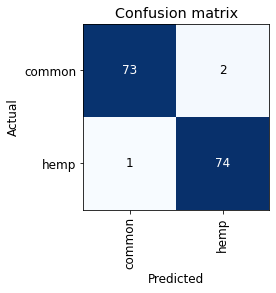

In [145]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

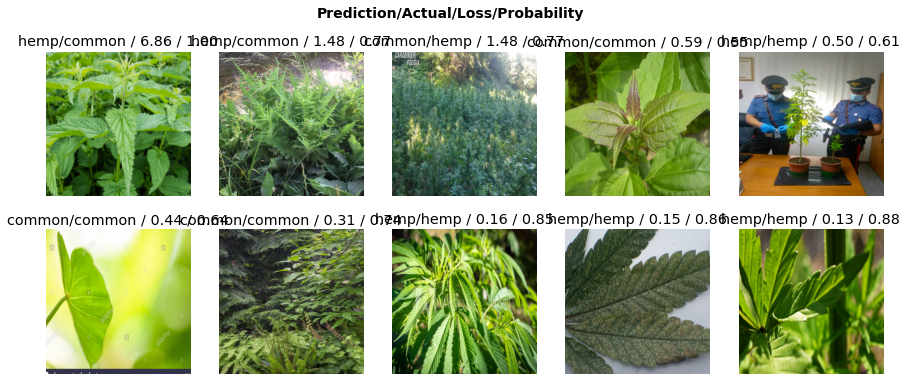

In [146]:
interp.plot_top_losses(10, nrows=2)

In [ ]:
#cleaner = ImageClassifierCleaner(learn)
#cleaner

In [ ]:
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [148]:
learn.export(path/'export.pkl')

#path = Path()
path = Path(root_dir)

learn_inf = load_learner(path/'export.pkl')

In [150]:
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description='Classify')
out_pl = widgets.Output()
lbl_pred = widgets.Label()

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(144,144))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'    

btn_run.on_click(on_click_classify)

In [151]:
display(VBox([widgets.Label('Upload your plant image:'), btn_upload, btn_run, out_pl, lbl_pred]))